In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Dataset from Airbnb listings in New York City from 2019: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=download&select=AB_NYC_2019.csv

with zipfile.ZipFile('Data/ny_airbnb.zip') as myzip:
    with myzip.open('AB_NYC_2019.csv') as myfile:
        df = pd.read_csv(myfile)

### Understand data and cleaning

In [3]:
df.shape

(48895, 16)

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
# Validating if there are duplicate values
print("Duplicate values: ", df.duplicated().sum())

Duplicate values:  0


In [120]:
# Validating null values per column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
reviews_grp                       32998
dtype: int64

In [121]:
df.fillna({'reviews_per_month':0}, inplace = True)

It's not necessary to change or erase the name and host_name NA values because they have an actual id. For the last_review column, it seems that there are no reviews on the airbnb which is useful data. 

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [23]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Data exploration

In [33]:
#Simple frequency table with percentage values
df.neighbourhood_group.value_counts(normalize='columns')*100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

In [49]:
# Complex table to understand the share of each room type by neighbourhood
dx = df.groupby("neighbourhood_group")["room_type"].value_counts(normalize=True) * 100
dx = dx.unstack()
dx

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,34.738772,59.761687,5.499542
Brooklyn,47.547752,50.397931,2.054318
Manhattan,60.934398,36.849638,2.215964
Queens,36.992587,59.512884,3.494529
Staten Island,47.184987,50.402145,2.412869


In [50]:
dy = df.groupby("room_type")["neighbourhood_group"].value_counts(normalize=True) * 100
dy = dy.unstack()
dy

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,1.491597,37.620528,51.946161,8.249046,0.692668
Private room,2.920362,45.382066,35.752038,15.103467,0.842068
Shared room,5.172414,35.603448,41.379310,17.068966,0.775862


In [164]:
# Complex pivot table with two variables to group
df["reviews_grp"] = pd.cut(df.reviews_per_month, [1, 5, 10, 15])
dx = df.groupby(["room_type","neighbourhood_group"])["reviews_grp"]
dx = dx.value_counts(normalize=True) * 100
dx = dx.unstack(level=2) # move the neighbourhood_group index to columns
dx = dx.round(2) # round the percentages to 2 decimal places
dx

(1, 5]  (5, 10]  (10, 15]
room_type       neighbourhood_group                           
Entire home/apt Bronx                 86.87    12.63      0.51
                Brooklyn              93.68     6.17      0.15
                Manhattan             93.23     6.66      0.12
                Queens                86.51    12.01      1.48
                Staten Island         90.22     9.78      0.00
Private room    Bronx                 92.88     7.12      0.00
                Brooklyn              90.83     8.94      0.23
                Manhattan             88.66    11.15      0.19
                Queens                85.02    12.79      2.19
                Staten Island         94.19     4.65      1.16
Shared room     Bronx                 94.74     5.26      0.00
                Brooklyn              98.17     1.83      0.00
                Manhattan             88.66    10.82      0.52
                Queens                91.18     7.35      1.47
                Staten Island          0.00   100.00      0.00

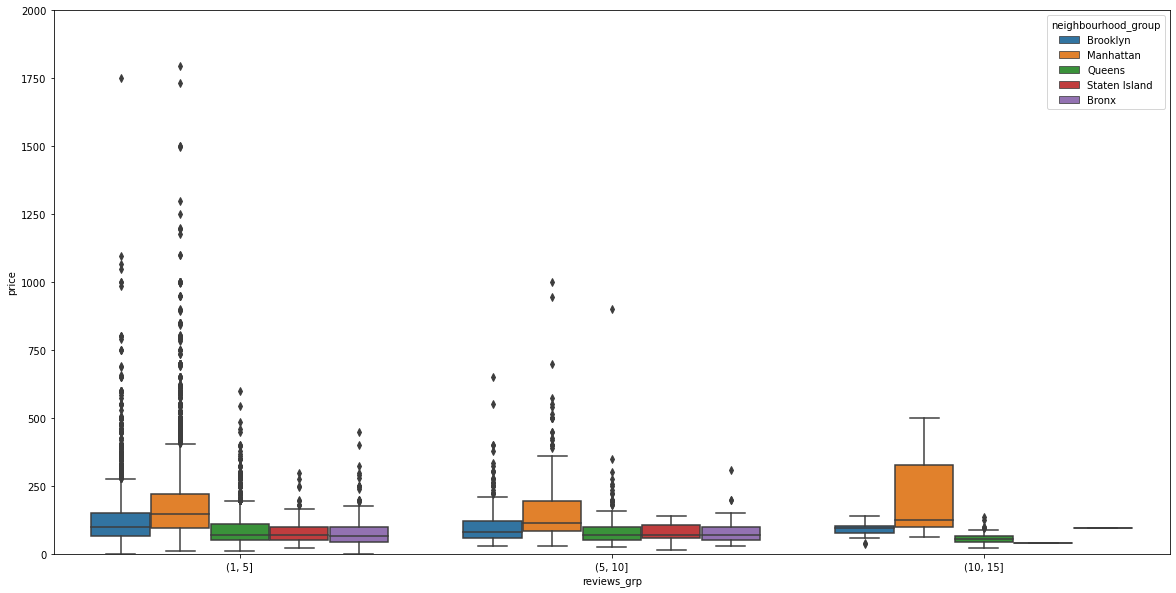

In [71]:
# Boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x="reviews_grp", y="price", hue="neighbourhood_group", data=df)
plt.ylim(0, 2000) # set the upper limit of y-axis to 1000
plt.show()

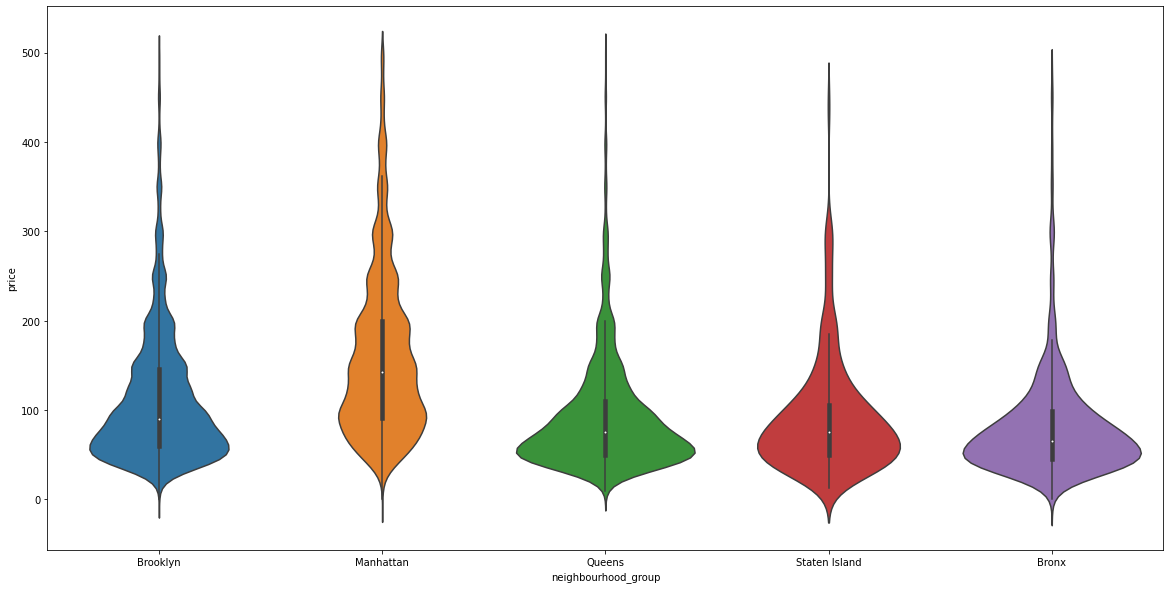

In [74]:
# Let's visualize the data without the outliers to visualize the average price per neighbourhood
df_price = df[df.price < 500] 

plt.figure(figsize=(20, 10))
sns.violinplot(data=df_price, x='neighbourhood_group', y='price')
plt.show()

In [81]:
print("Average price for all neighbourhood groups:", round(np.mean(df.price),2))

Average price for all neighbourhood groups: 152.72


Now let's take a look into the popularity of the neighbourhoods.

In [90]:
# Count of unique neighbourhood
len(df.neighbourhood.unique())

221

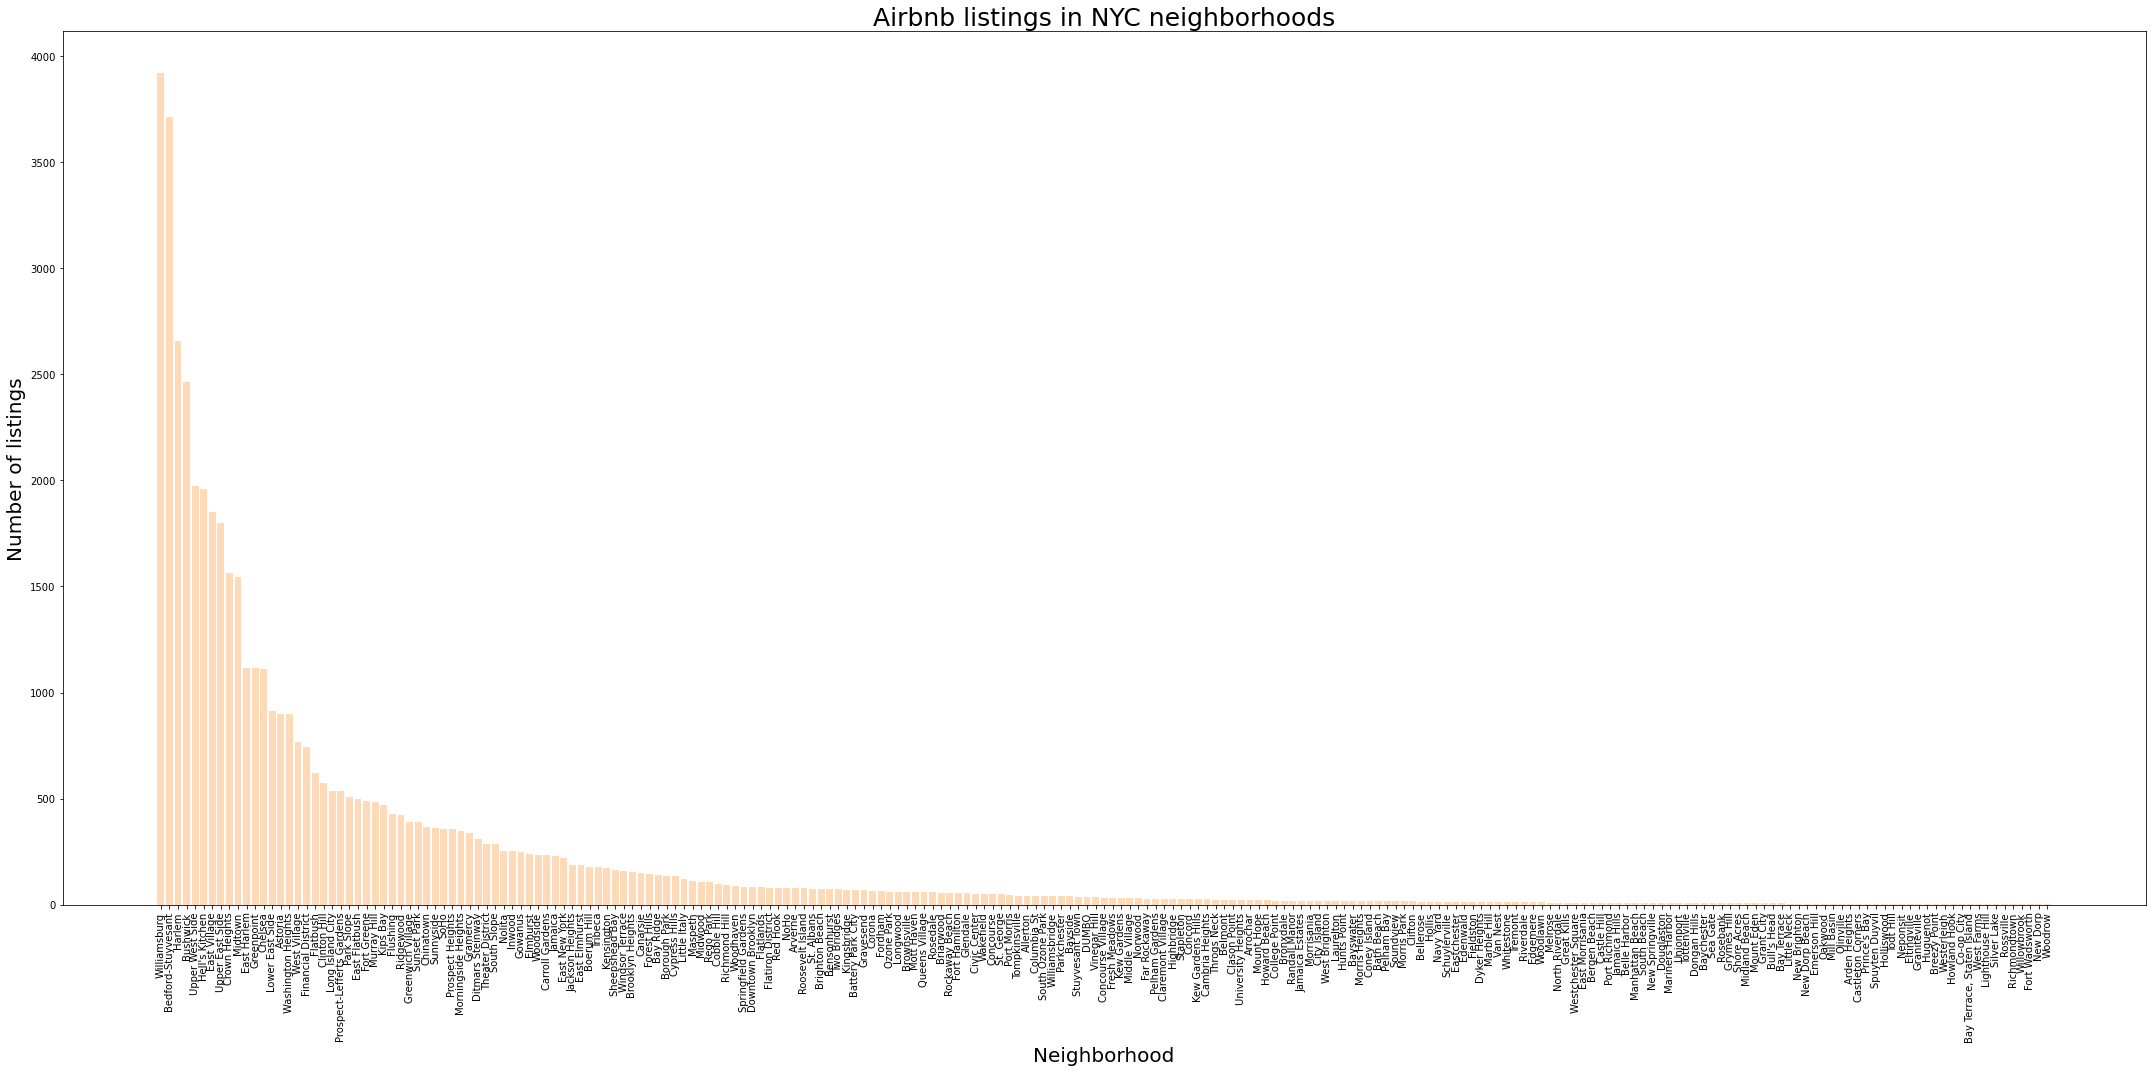

In [116]:
# Group by neighbourhood and count the number of listings
df_grouped = df.groupby('neighbourhood').agg({'id':'count'})

# Sort the data
df_grouped = df_grouped.sort_values('id', ascending=False)

# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30,15))

# plot the number of listings on the left y-axis
ax1.bar(df_grouped.index, df_grouped['id'], color='peachpuff')
ax1.set_ylabel('Number of listings', color='black',fontsize=20)

# set x-axis tick labels to be rotated
plt.xticks(rotation=90)

plt.title('Airbnb listings in NYC neighborhoods',fontsize=25)
plt.xlabel('Neighborhood',color='black',fontsize=20)

# adjust layout to prevent overlapping of x-axis tick labels
fig.tight_layout()

plt.show()

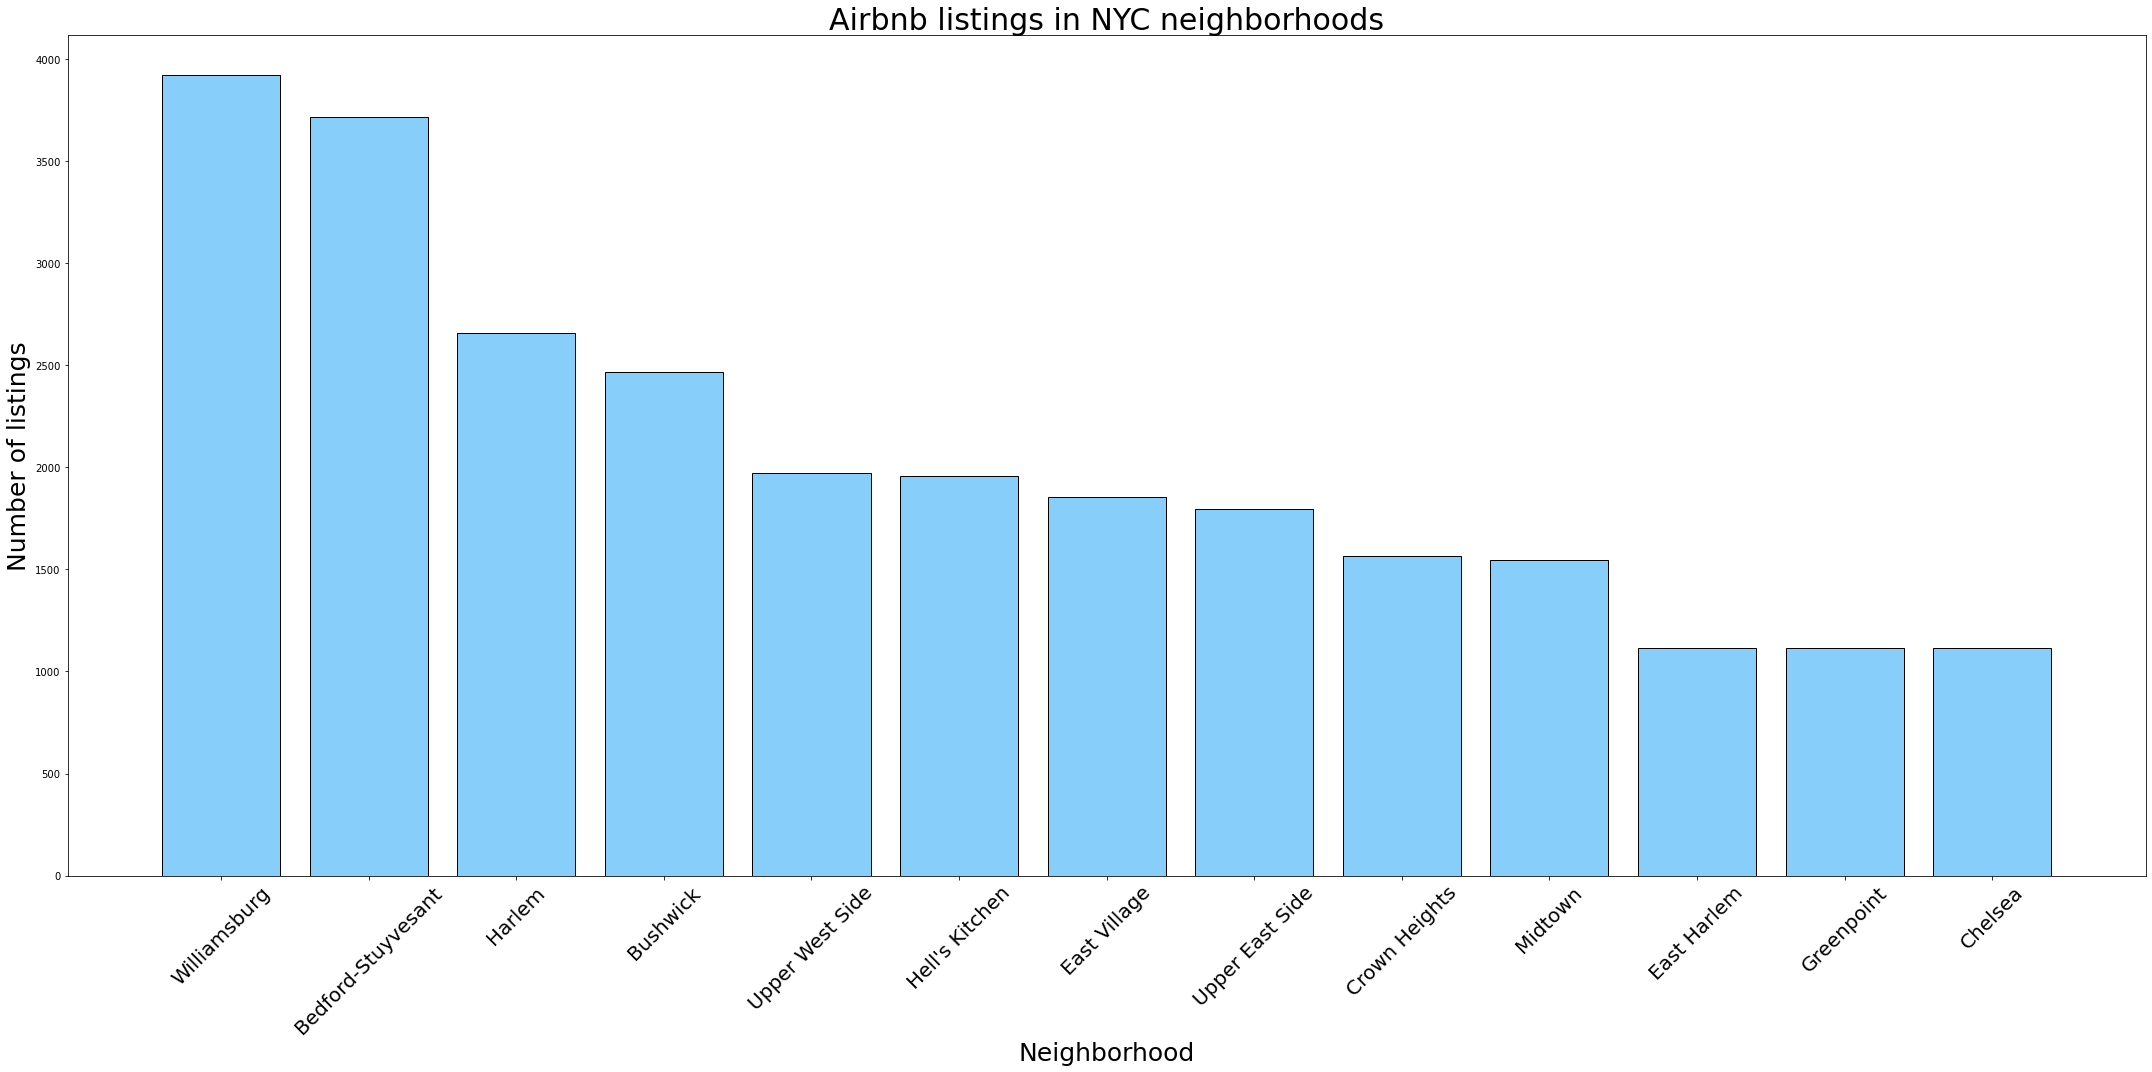

In [115]:
df_grouped = df_grouped[df_grouped['id'] > 1000] # only show neighborhoods with more than 1000 listings

# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30,15))

# plot the number of listings on the left y-axis
ax1.bar(df_grouped.index, df_grouped['id'], color='lightskyblue', edgecolor="black")
ax1.set_ylabel('Number of listings', color='black',fontsize=25)

# set x-axis tick labels to be rotated
plt.xticks(rotation=45, fontsize=20)

plt.title('Airbnb listings in NYC neighborhoods',fontsize=30)
plt.xlabel('Neighborhood',color='black',fontsize=25)

# adjust layout to prevent overlapping of x-axis tick labels
fig.tight_layout()

plt.show()

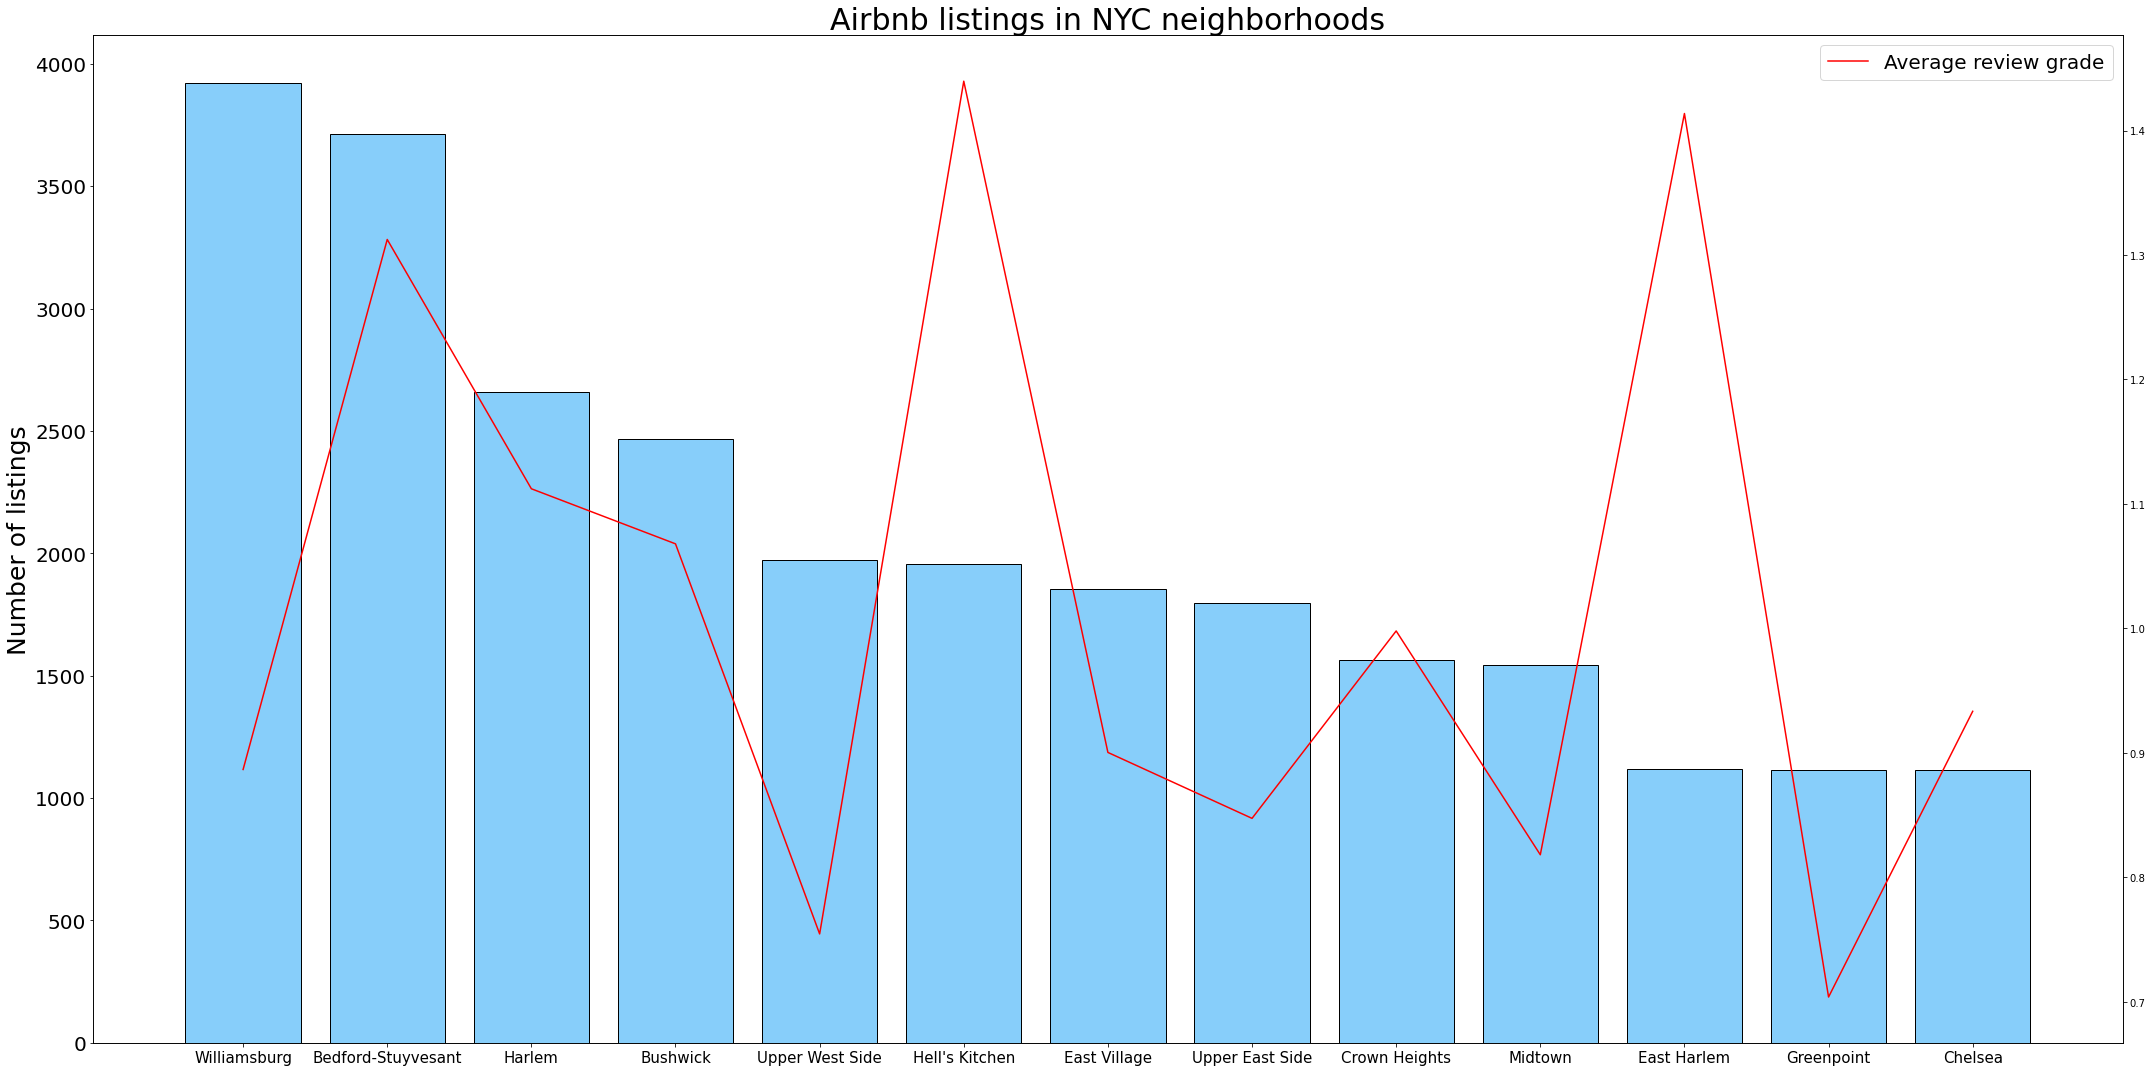

In [133]:
# Group by neighbourhood and count the number of listings
df_grouped = df.groupby('neighbourhood').agg({'id':'count','reviews_per_month':'mean'})

# only show neighborhoods with more than 1000 listings
df_grouped = df_grouped[df_grouped['id'] > 1000] 
df_grouped = df_grouped.sort_values('id', ascending=False)

# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30,15))

# plot the number of listings on the left y-axis
ax1.bar(df_grouped.index, df_grouped['id'], color='lightskyblue', edgecolor="black")
ax1.set_ylabel('Number of listings', color='black',fontsize=25)

# create a second y-axis object
ax2 = ax1.twinx()

# plot the average of reviews
ax2.plot(df_grouped.index, df_grouped['reviews_per_month'], color='red', label='Average review grade')

# set x-axis tick labels to be rotated
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=20)

plt.title('Airbnb listings in NYC neighborhoods',fontsize=30)
plt.xlabel('Neighborhood',color='black',fontsize=25)
plt.legend(fontsize=20)

# adjust layout to prevent overlapping of x-axis tick labels
fig.tight_layout()

plt.show()

How does the average review grade will look for all neighbourhoods?

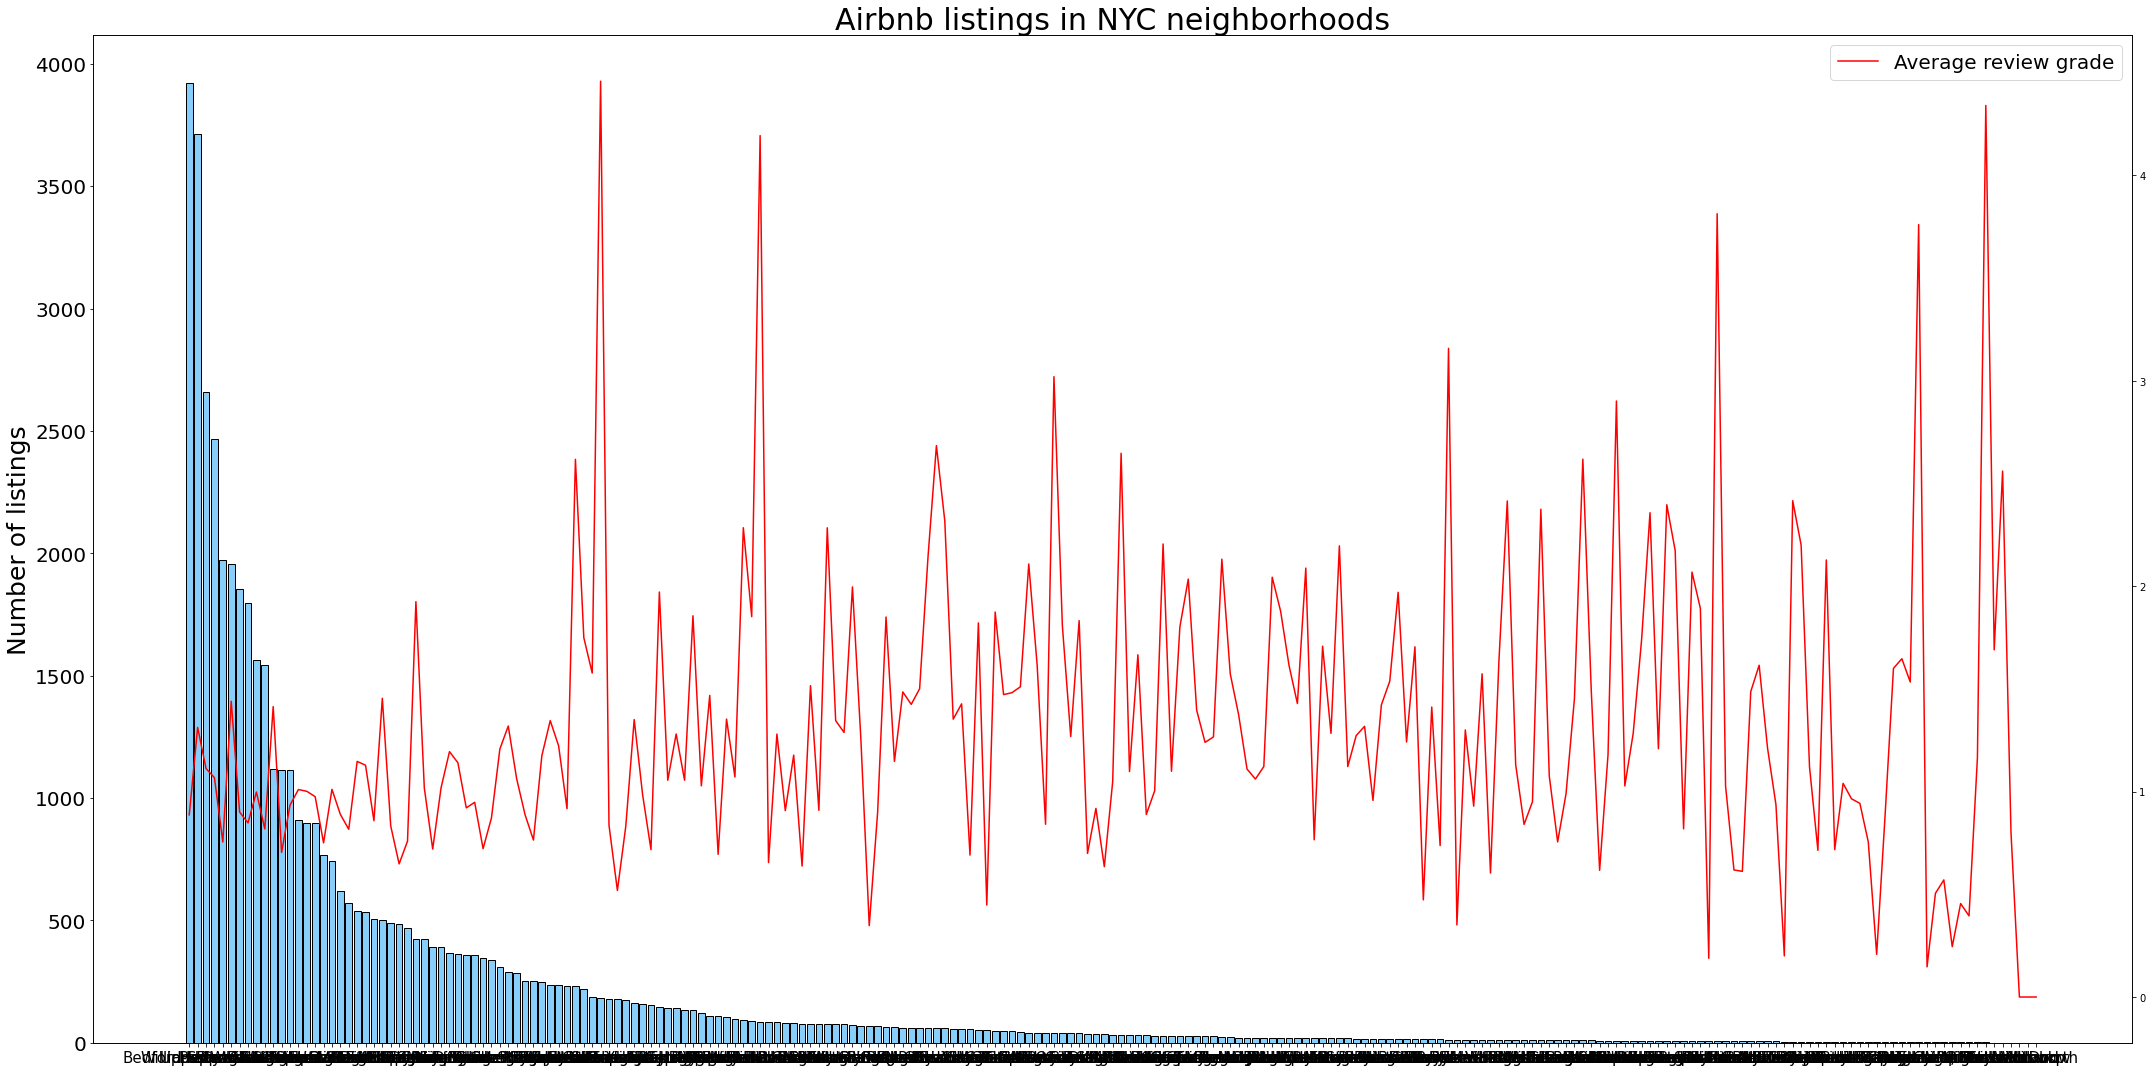

In [137]:
# Group by neighbourhood and count the number of listings
df_grouped = df.groupby('neighbourhood').agg({'id':'count','reviews_per_month':'mean'})

# Sort the data
df_grouped = df_grouped.sort_values('id', ascending=False)

# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30,15))

# plot the number of listings on the left y-axis
ax1.bar(df_grouped.index, df_grouped['id'], color='lightskyblue', edgecolor="black")
ax1.set_ylabel('Number of listings', color='black',fontsize=25)

# create a second y-axis object
ax2 = ax1.twinx()

# plot the average of reviews
ax2.plot(df_grouped.index, df_grouped['reviews_per_month'], color='red', label='Average review grade')

# set x-axis tick labels to be rotated
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=20)

plt.title('Airbnb listings in NYC neighborhoods',fontsize=30)
plt.xlabel('Neighborhood',color='black',fontsize=25)
plt.legend(fontsize=20)

# adjust layout to prevent overlapping of x-axis tick labels
fig.tight_layout()

plt.show()

### Mapping the data

Number of Airbnbs per neighbourhood group

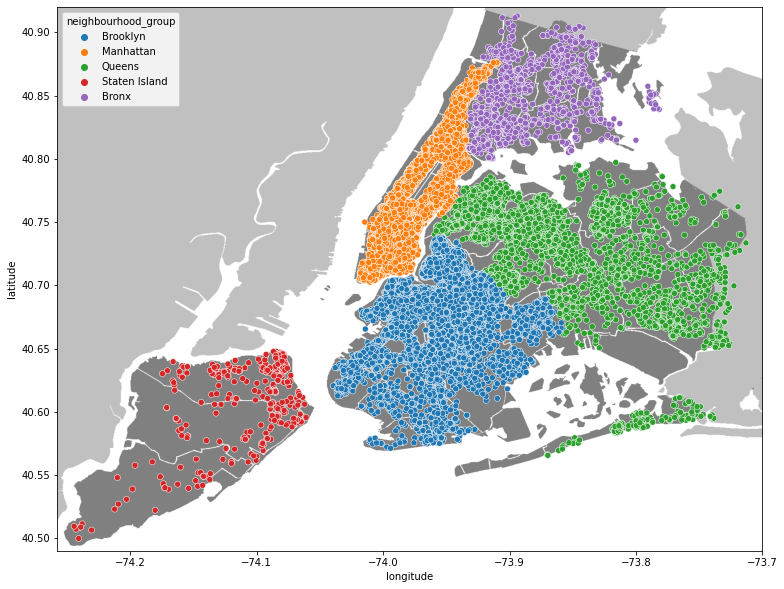

In [162]:
# image
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')

# create a figure and axis object
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-74.258, -73.7, 40.49, 40.92]) # ajustar los ejes para que se ajusten a la imagen

sns.scatterplot(x = df.longitude, y = df.latitude, hue=df.neighbourhood_group, ax=ax)
plt.show()

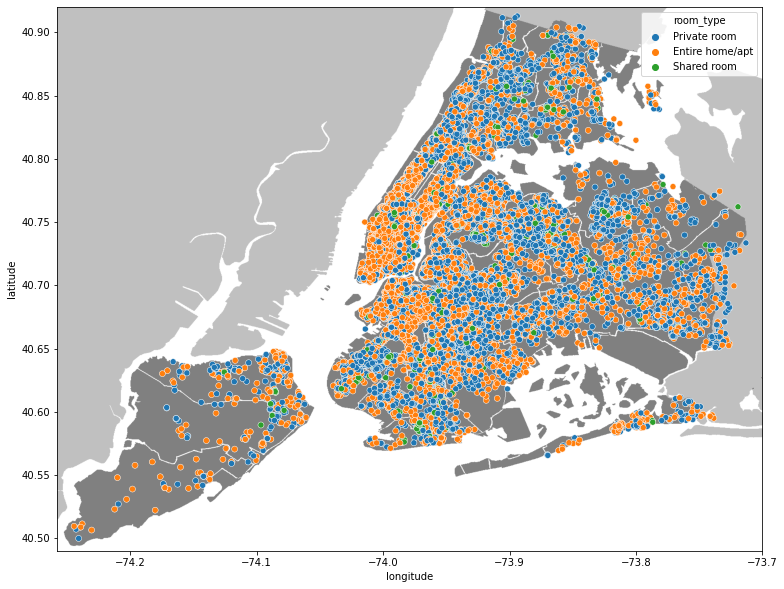

In [163]:
# image
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')

# create a figure and axis object
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-74.258, -73.7, 40.49, 40.92]) # ajustar los ejes para que se ajusten a la imagen

sns.scatterplot(x = df.longitude, y = df.latitude, hue=df.room_type, ax=ax)
plt.show()

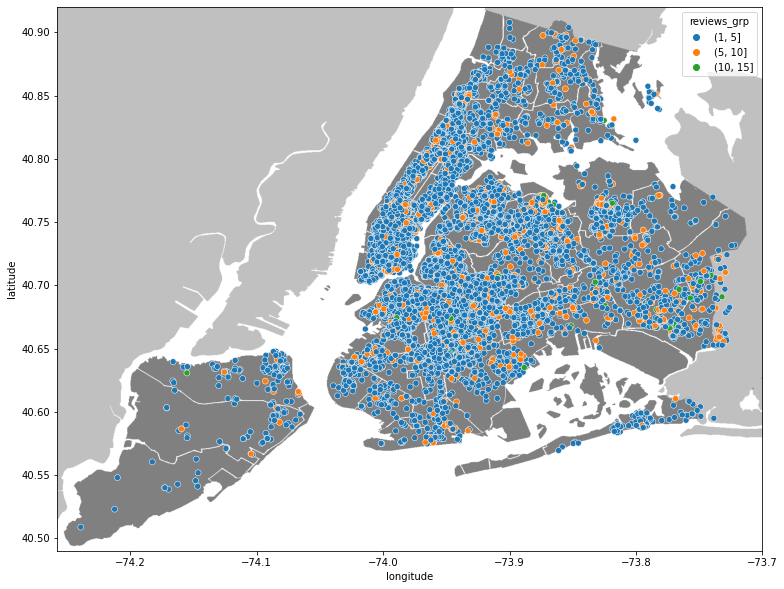

In [167]:
# image
img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')

# create a figure and axis object
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(img, extent=[-74.258, -73.7, 40.49, 40.92]) # ajustar los ejes para que se ajusten a la imagen

sns.scatterplot(x = df.longitude, y = df.latitude, hue=df.reviews_grp, ax=ax)
plt.show()

In [166]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_grp
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,"(1.0, 5.0]"
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,NaN


### Correlation of prices, availability, minimum_nights with reviews per month

<AxesSubplot:>

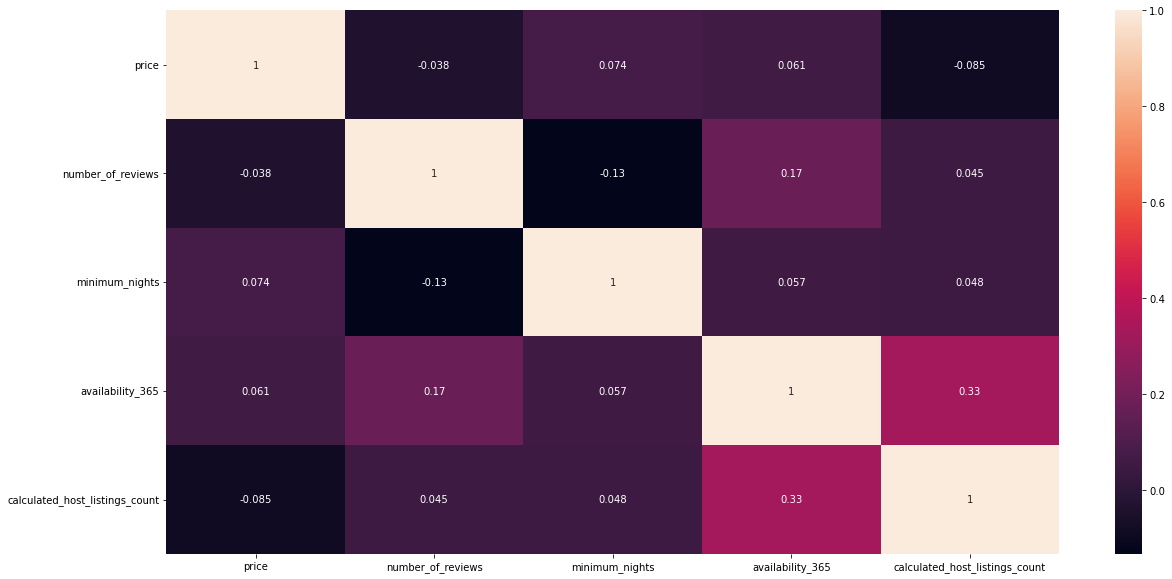

In [173]:
fig, ax = plt.subplots(figsize=(20,10))

# Select the relevant columns
cols = ['price', 'number_of_reviews','minimum_nights','availability_365','calculated_host_listings_count']

# Compute the correlation matrix
corr_matrix = df[cols].corr(method='kendall')

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)

### Time series of the reviews

In [174]:
# Dataframe of the last reviews converting it to datetime
df['last_review'] = pd.to_datetime(df['last_review'])
df.set_index('last_review', inplace=True)

In [177]:
# Resample the data by month and compute the mean of each group
df_monthly = df.resample('M').mean()

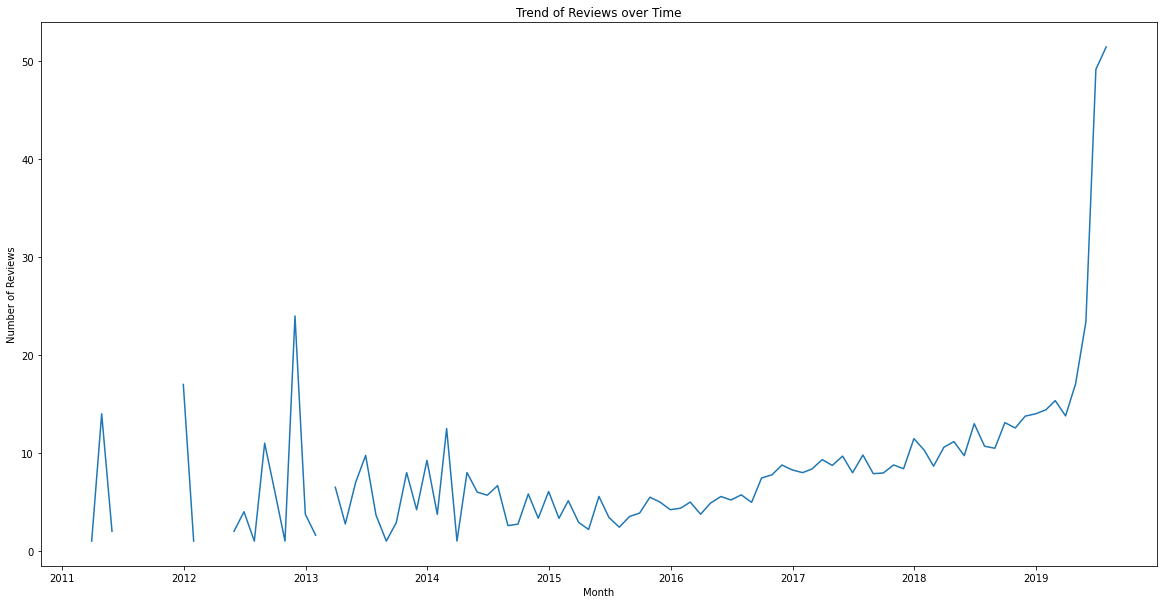

In [178]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_monthly.index, df_monthly['number_of_reviews'], label='Average Number of Reviews per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Reviews')
ax.set_title('Trend of Reviews over Time')
plt.show()